# Preliminary Data Analysis

In [1]:
! pip install azure-storage-blob azure-identity xgboost tensorflow pyspark windrose pywake geopy

In [2]:
from azure.storage.blob import BlobServiceClient, BlobClient
import xgboost
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from dotenv import load_dotenv
import os
from tqdm import tqdm
import asyncio
from io import StringIO
from windrose import WindroseAxes

### Fetching azure blobs

Run download_files.py

### Make dataframes

In [3]:
data = {}
data_path = './data'
for csv_file in os.listdir(data_path):
    data[csv_file.replace('.csv', '')] = pd.read_csv(data_path+'/'+csv_file, low_memory=False)
    print(csv_file)

activepower_DOW_2023_10min_avg.csv
blade_angleA_DOW_2023_10min_avg.csv
blade_angleB_DOW_2023_10min_avg.csv
blade_angleC_DOW_2023_10min_avg.csv
DOW_2023_Air_Pres_Hum.csv
Dudgeon_coordinates.csv
RAW_ActivePower_DOW_4_Nov_2023.csv
RAW_Windspeed_DOW_4_Nov_2023.csv
RPM_DOW_2023_10min_avg.csv
windspeed_DOW_2023_10min_avg.csv
wind_direction_DOW_2023_10min_avg.csv
yaw_angle_DOW_2023_10min_avg.csv


### Filling na values of wd and yaw

In [4]:
data['yaw_angle_DOW_2023_10min_avg'] = data['yaw_angle_DOW_2023_10min_avg'].sort_values(by='timestamp').ffill().dropna()    #Ikke egt riktig (bfill), men kanskje bedre en å droppe
data['wind_direction_DOW_2023_10min_avg'] = data['wind_direction_DOW_2023_10min_avg'].sort_values(by='timestamp').ffill().dropna()



In [5]:
ws_wd_yaw_10_min = pd.merge(data['windspeed_DOW_2023_10min_avg'], data['wind_direction_DOW_2023_10min_avg'], on='timestamp', how='outer')
ws_wd_yaw_10_min = pd.merge(ws_wd_yaw_10_min, data['yaw_angle_DOW_2023_10min_avg'],  on='timestamp', how='outer')

wd_ws_A01 = ws_wd_yaw_10_min[['timestamp', 'DOW-A01-WindSpeed', 'DOW-A01-WindDirection']].dropna()
wd_ws_F02 = ws_wd_yaw_10_min[['timestamp', 'DOW-F02-WindSpeed', 'DOW-F02-WindDirection']].dropna()
wd_ws_B01 = ws_wd_yaw_10_min[['timestamp', 'DOW-B01-WindSpeed', 'DOW-B01-WindDirection']].dropna()

### Wind direction

In [6]:
def timestamp_to_datetime_index(df):
    if 'timestamp' not in df.columns:
        raise KeyError('timestamp not in dataframe')
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')
    return df

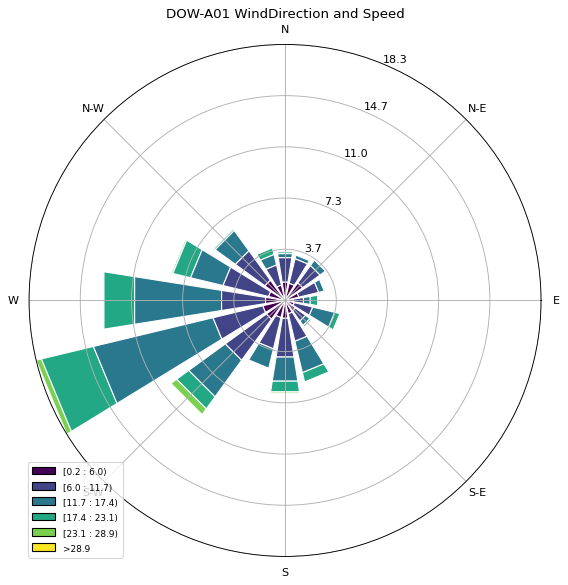

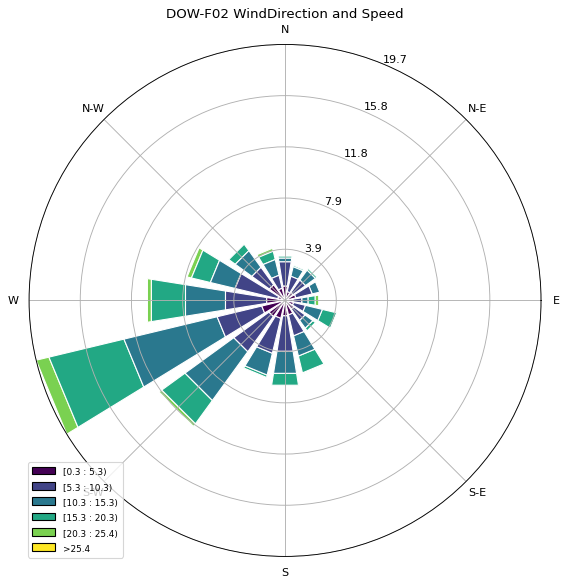

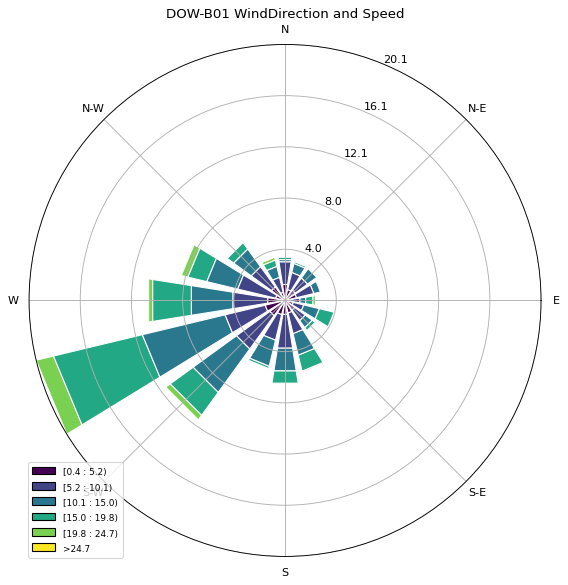

In [7]:

ax1 = WindroseAxes.from_ax()
ax1.bar(wd_ws_A01['DOW-A01-WindDirection'], wd_ws_A01['DOW-A01-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax1.set_legend()

ax1.set_title("DOW-A01 WindDirection and Speed")


ax2 = WindroseAxes.from_ax()
ax2.bar(wd_ws_F02['DOW-F02-WindDirection'], wd_ws_F02['DOW-F02-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax2.set_legend()

ax2.set_title("DOW-F02 WindDirection and Speed")


ax3 = WindroseAxes.from_ax()
ax3.bar(wd_ws_B01['DOW-B01-WindDirection'], wd_ws_B01['DOW-B01-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax3.set_legend()

ax3.set_title("DOW-B01 WindDirection and Speed")



plt.show()

### Checking wind directions for single days


In [8]:
wd_ws_A01 = timestamp_to_datetime_index(wd_ws_A01)
wd_ws_F02 = timestamp_to_datetime_index(wd_ws_F02)
wd_ws_B01 = timestamp_to_datetime_index(wd_ws_B01)

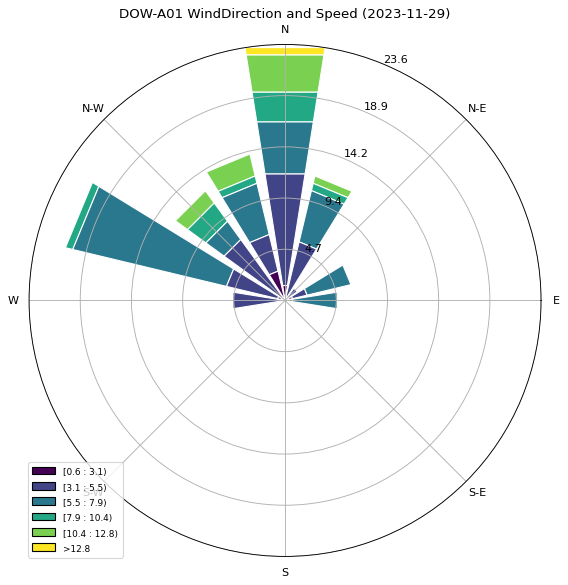

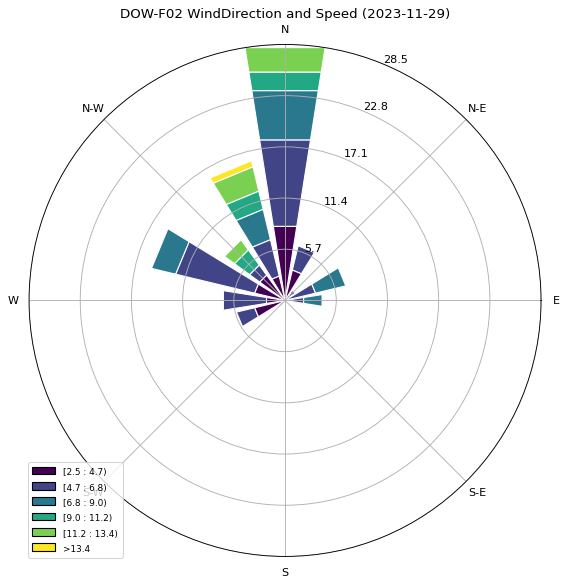

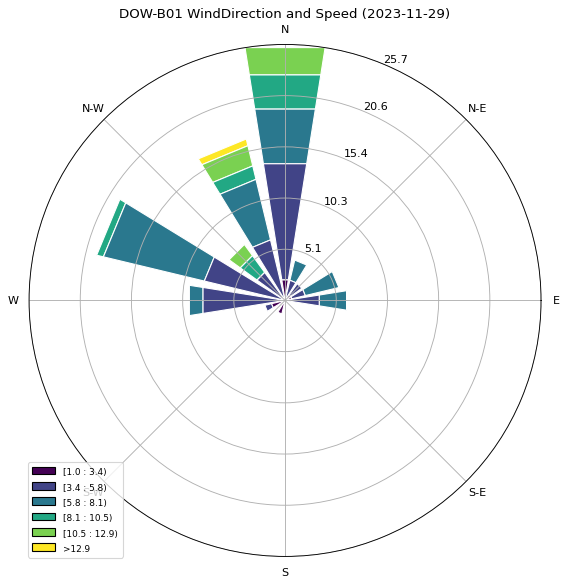

In [9]:
ax1 = WindroseAxes.from_ax()


targeted_date = '2023-11-29'


ax1.bar(wd_ws_A01.loc[targeted_date]['DOW-A01-WindDirection'], wd_ws_A01.loc[targeted_date]['DOW-A01-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax1.set_legend()

ax1.set_title(f"DOW-A01 WindDirection and Speed ({targeted_date})")


ax2 = WindroseAxes.from_ax()
ax2.bar(wd_ws_F02.loc[targeted_date]['DOW-F02-WindDirection'], wd_ws_F02.loc[targeted_date]['DOW-F02-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax2.set_legend()

ax2.set_title(f"DOW-F02 WindDirection and Speed ({targeted_date})")


ax3 = WindroseAxes.from_ax()
ax3.bar(wd_ws_B01.loc[targeted_date]['DOW-B01-WindDirection'], wd_ws_B01.loc[targeted_date]['DOW-B01-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax3.set_legend()

ax3.set_title(f"DOW-B01 WindDirection and Speed ({targeted_date})")



plt.show()

### Yaw offset

# massive problem

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Sondre\AppData\Local\Temp\ipykernel_13340\1395964628.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%a$^\circ$'))


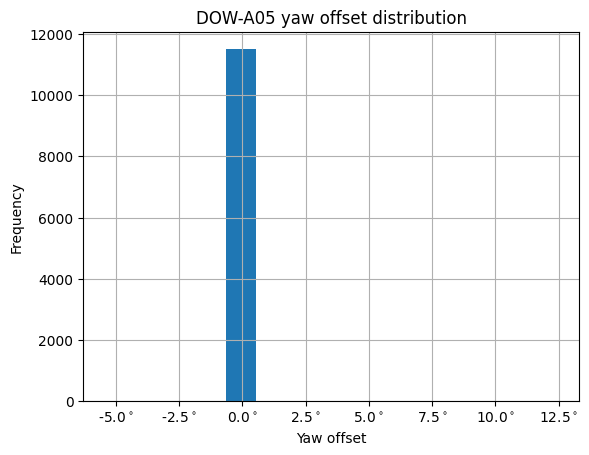

       DOW-A05-WindDirection  DOW-A05-NacelleDirection  DOW-A05-YawOffset
12417             245.865215                251.261719          -5.396504
12418             245.865215                251.261719          -5.396504
12419             245.865215                251.261719          -5.396504
12420             245.865215                251.261719          -5.396504
12421             245.865215                251.261719          -5.396504
12400             251.220703                254.632355          -3.411651
12401             251.220703                254.632355          -3.411651
12156             256.350267                259.350586          -3.000319
12157             256.350267                259.350586          -3.000319
12158             256.350267                259.350586          -3.000319
12457             225.087849                227.885742          -2.797893
12227             240.545629                241.992188          -1.446559
12228             240.545629          

In [10]:
from matplotlib.ticker import FormatStrFormatter


target_turbine = 'A05'

yaw_offset = ws_wd_yaw_10_min[[f'DOW-{target_turbine}-WindDirection', f'DOW-{target_turbine}-NacelleDirection']].dropna()

yaw_offset[f'DOW-{target_turbine}-YawOffset'] = yaw_offset[f'DOW-{target_turbine}-WindDirection'] - yaw_offset[f'DOW-{target_turbine}-NacelleDirection']


#yaw_offset.drop(index=yaw_offset.nlargest(10, f'DOW-{target_turbine}-YawOffset').index, inplace=True)
#yaw_offset.drop(index=yaw_offset.nsmallest(10, f'DOW-{target_turbine}-YawOffset').index, inplace=True)
yaw_offset[f'DOW-{target_turbine}-YawOffset'].hist(bins=15)
plt.xlabel('Yaw offset')
plt.ylabel('Frequency')
plt.title(f'DOW-{target_turbine} yaw offset distribution')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%a$^\circ$'))

plt.show()
print(yaw_offset.nsmallest(columns=f'DOW-{target_turbine}-YawOffset', n=20))

### Turbulence correlation

In [11]:
import math
from datetime import datetime, timedelta
pd.options.mode.copy_on_write = True

def calculate_TI(ws_df, interval = 5):
    bin_delta = timedelta(minutes=interval)
    is_series = False
    try:
        ws_column = [s for s in ws_df.columns if 'WindSpeed' in s][0]
    except:
        if 'WindSpeed' in ws_df.name:
            ws_column = ws_df.name
            is_series = True
        else:
            raise KeyError('No windspeed column found')
        
    TI_label = ws_column.replace('WindSpeed', 'TI')

    print('Using column: ', ws_column)
    print('Resuts into column: ', TI_label)
    print('Input is series: ', is_series)

    def calculate_rolling_TI_std():
        if is_series:
            mean = ws_df.rolling(window = bin_delta, min_periods = 8).mean()
            std = ws_df.rolling(window = bin_delta, min_periods = 8).std()
            ti = std/mean
            ti = ti.rename(TI_label)

        else:
            mean = ws_df[ws_column].rolling(window = bin_delta, min_periods = 8).mean()
            std = ws_df[ws_column].rolling(window = bin_delta, min_periods = 8).std()
            ti = std/mean
            ti = ti.rename(columns = {ws_column: TI_label})
        return ti
    
    ti = calculate_rolling_TI_std()
    return ti



### Fetching D05 and D06 data, for analysis.

In [12]:

pivot_df = data['RAW_Windspeed_DOW_4_Nov_2023'].pivot(index='source_timestamp', columns='tag', values='double_value')
pivot_df = pivot_df.reset_index()
pivot_df = pivot_df.rename(columns = {'source_timestamp': 'timestamp'})
pivot_df = timestamp_to_datetime_index(pivot_df)


J04_raw_ws = pivot_df['DOW-J04-WindSpeed'].dropna()
T05_raw_ws = pivot_df['DOW-T05-WindSpeed'].dropna()

pivot_df = data['RAW_ActivePower_DOW_4_Nov_2023'].pivot(index='source_timestamp', columns='tag', values='double_value')
pivot_df = pivot_df.reset_index()
pivot_df = pivot_df.rename(columns = {'source_timestamp': 'timestamp'})
pivot_df = timestamp_to_datetime_index(pivot_df)

J04_raw_ap = pivot_df['DOW-J04-ActivePower'].dropna()
T05_raw_ap = pivot_df['DOW-T05-ActivePower'].dropna()

T05_wd = data['wind_direction_DOW_2023_10min_avg'][['timestamp', 'DOW-T05-WindDirection']]
J04_wd = data['wind_direction_DOW_2023_10min_avg'][['timestamp', 'DOW-J04-WindDirection']]


### Highlighting targeted turbines 

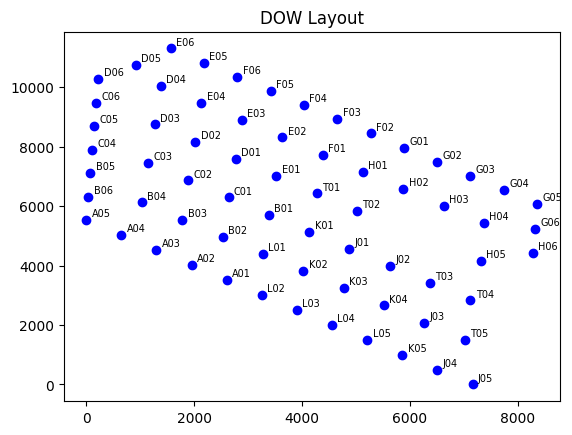

In [13]:
from demo import plot_DOW_layout
plot_DOW_layout()

Checking distance versions

In [14]:
from dudgeon import get_distance_from_names, ANCHOR_LAT, ANCHOR_LON, haversine_distance
from geopy.distance import lonlat, distance, great_circle

H03 = lonlat(1.418953, 53.266246)
H04 = lonlat(1.430149, 53.261054)
h4 = (53.261054, 1.430149)

h3 = (53.266246, 1.418953)

print(get_distance_from_names('H03', 'H04'))
print(distance(H03, H04).meters)
print(great_circle(h3, h4))

942.2280585958373
944.4635471886387
0.9422280585960594 km


### Calculating TI And test TI validity

In [15]:

T05_TI = calculate_TI(ws_df=T05_raw_ws)
J04_TI = calculate_TI(ws_df=J04_raw_ws)

Using column:  DOW-T05-WindSpeed
Resuts into column:  DOW-T05-TI
Input is series:  True
Using column:  DOW-J04-WindSpeed
Resuts into column:  DOW-J04-TI
Input is series:  True


In [16]:
merge_test = pd.DataFrame({J04_TI.name: J04_TI.dropna(), T05_TI.name:T05_TI.dropna()})
merge_test_10_min_avg = merge_test.resample('10min').mean().dropna()
wd_turb_test = data['wind_direction_DOW_2023_10min_avg'][['timestamp', 'DOW-J04-WindDirection', 'DOW-T05-WindDirection']]
wd_turb_test = timestamp_to_datetime_index(wd_turb_test)
turb_test = pd.merge(merge_test_10_min_avg, wd_turb_test, on='timestamp')
inwake = turb_test[((turb_test['DOW-J04-WindDirection']> 210) & (turb_test['DOW-J04-WindDirection']<250))]
outwake = turb_test[((turb_test['DOW-J04-WindDirection']> 120) & (turb_test['DOW-J04-WindDirection']<170))]

print('T05 TI higher than J04 when downstream:',  len(inwake[inwake['DOW-J04-TI']<inwake['DOW-T05-TI']].index), 'out of', len(inwake.index))
print('T05 TI higher than J04 when clear flowfield:',  len(outwake[outwake['DOW-J04-TI']<outwake['DOW-T05-TI']].index), 'out of', len(outwake.index))


T05 TI higher than J04 when downstream: 3 out of 7
T05 TI higher than J04 when clear flowfield: 17 out of 32


### Wind Direction this day

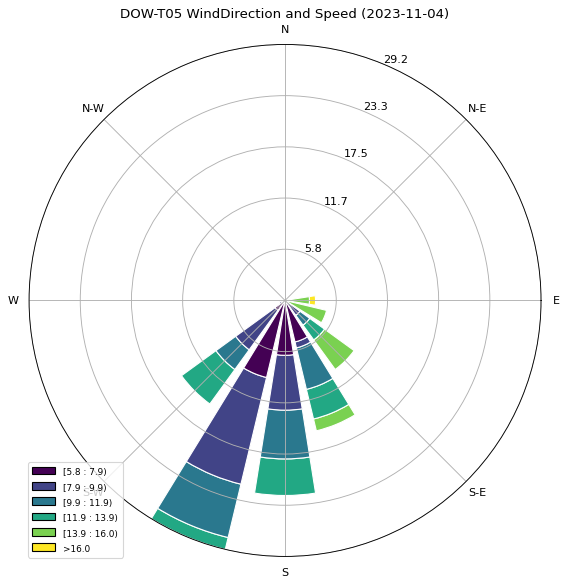

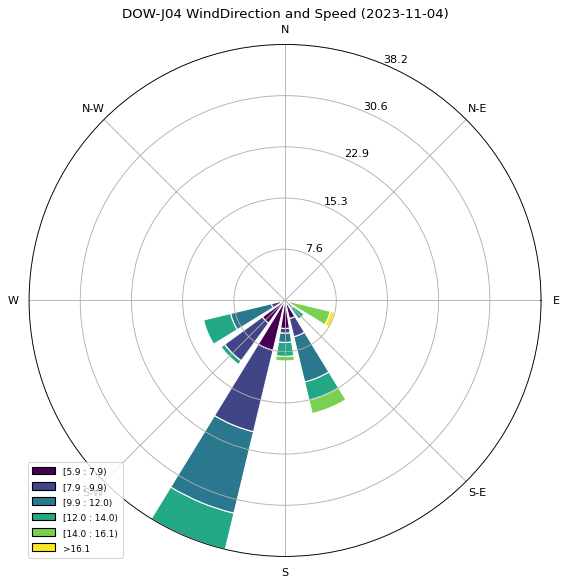

In [17]:
wd_ws_J04 = ws_wd_yaw_10_min[['timestamp', 'DOW-J04-WindSpeed', 'DOW-J04-WindDirection']].dropna()
wd_ws_T05 = ws_wd_yaw_10_min[['timestamp', 'DOW-T05-WindSpeed', 'DOW-T05-WindDirection']].dropna()

wd_ws_J04 = timestamp_to_datetime_index(wd_ws_J04)
wd_ws_T05 = timestamp_to_datetime_index(wd_ws_T05)

wd_ws_J04_raw_day = wd_ws_J04.loc['2023-11-04']
wd_ws_T05_raw_day = wd_ws_T05.loc['2023-11-04']



ax6 = WindroseAxes.from_ax()
ax6.bar(wd_ws_T05_raw_day['DOW-T05-WindDirection'], wd_ws_T05_raw_day['DOW-T05-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax6.set_legend()
ax6.set_title("DOW-T05 WindDirection and Speed (2023-11-04)")

ax5 = WindroseAxes.from_ax()
ax5.bar(wd_ws_J04_raw_day['DOW-J04-WindDirection'], wd_ws_J04_raw_day['DOW-J04-WindSpeed'], normed=True, opening=0.8, edgecolor='white')
ax5.set_legend()
ax5.set_title("DOW-J04 WindDirection and Speed (2023-11-04)")

plt.show()


### Pitch control


In [18]:
bladeA = data['blade_angleA_DOW_2023_10min_avg']
bladeB = data['blade_angleB_DOW_2023_10min_avg']
bladeC = data['blade_angleC_DOW_2023_10min_avg']
ws = data['windspeed_DOW_2023_10min_avg'][['timestamp', 'DOW-A01-WindSpeed']]
active_power_a01 = data['activepower_DOW_2023_10min_avg'][['timestamp', 'DOW-A01-ActivePower']]


A01_pitch = pd.merge(bladeA, bladeB, on='timestamp', how='outer')
A01_pitch = pd.merge(A01_pitch, bladeC, on='timestamp', how='outer')
A01_pitch = pd.merge(A01_pitch, active_power_a01, on='timestamp', how='outer')
A01_pitch = pd.merge(A01_pitch, ws,  on='timestamp', how='outer')[['timestamp', 'DOW-A01-BladeAngleA', 'DOW-A01-BladeAngleB', 'DOW-A01-BladeAngleC', 'DOW-A01-WindSpeed', 'DOW-A01-ActivePower']]

A01_pitch = timestamp_to_datetime_index(A01_pitch)

<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Sondre\AppData\Local\Temp\ipykernel_13340\538752752.py:27: SyntaxWarning: invalid escape sequence '\c'
  plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%a$^\circ$'))


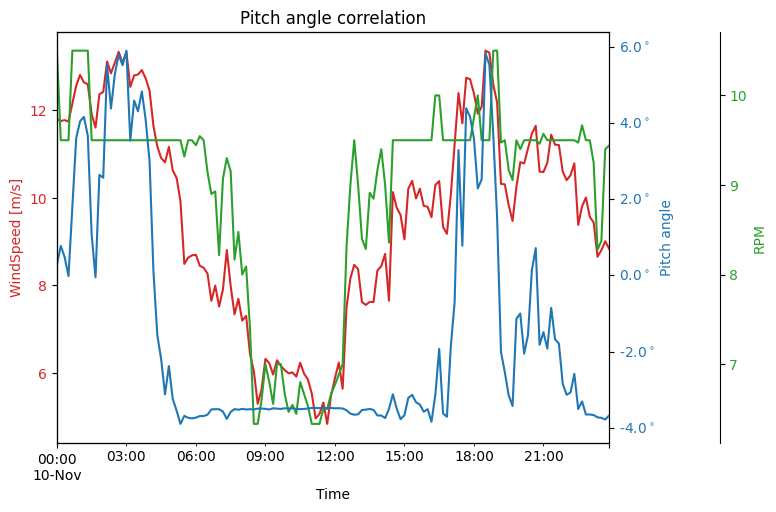

In [19]:
date = '2023-11-10'

rpm_a01 = data['RPM_DOW_2023_10min_avg'][['timestamp', 'DOW-A01-GenRPM']]
rpm_a01 = rpm_a01.ffill().dropna()
rpm_a01 = timestamp_to_datetime_index(rpm_a01)
plt.rcParams["figure.figsize"] = (8, 5)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('WindSpeed [m/s]', color=color)
A01_pitch.loc[date]['DOW-A01-WindSpeed'].plot(ax=ax1, color=color, xlabel='Time')

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines.right.set_position(("axes", 1.2))

color = 'tab:green'
ax2.set_ylabel('RPM', color=color)  
rpm_a01.loc[date]['DOW-A01-GenRPM'].plot(ax = ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax3.set_ylabel('Pitch angle', color=color)  
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%a$^\circ$'))
A01_pitch.loc[date]['DOW-A01-BladeAngleA'].plot(ax=ax3, color=color)
ax3.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
#fig.legend(['Wind Speed', 'Active Power', 'Pitch angle'])
plt.title("Pitch angle correlation")
plt.show()







### RPM

<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Sondre\AppData\Local\Temp\ipykernel_13340\564667360.py:18: SyntaxWarning: invalid escape sequence '\c'
  plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%a$^\circ$'))


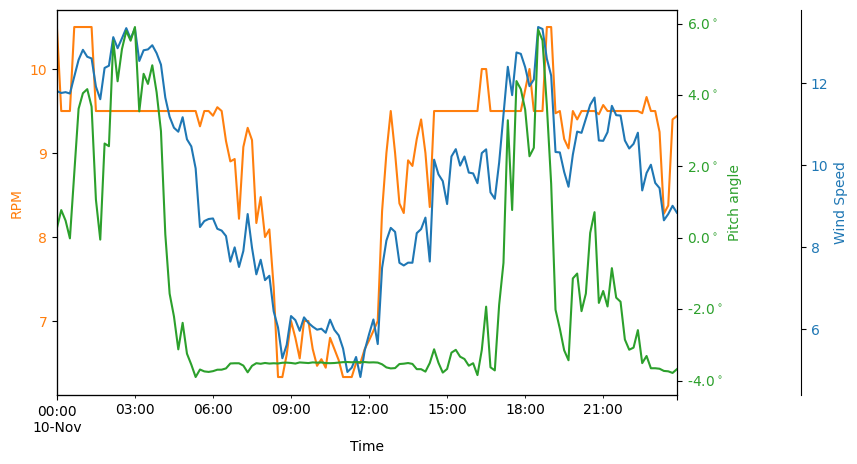

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines.right.set_position(("axes", 1.2))
color = 'tab:orange'
ax1.set_ylabel('RPM', color=color)  
rpm_a01.loc[date]['DOW-A01-GenRPM'].plot(ax = ax1, color=color, xlabel = 'Time')
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'  
ax2.set_ylabel('Wind Speed', color=color)  
A01_pitch.loc[date]['DOW-A01-WindSpeed'].plot(ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax3.set_ylabel('Pitch angle', color=color)  
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%a$^\circ$'))
A01_pitch.loc[date]['DOW-A01-BladeAngleA'].plot(ax=ax3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

plt.show()

### Theoretical Power Curve

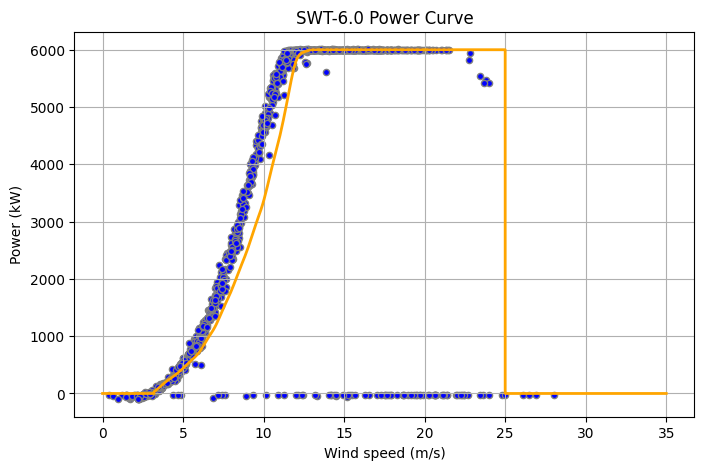

In [21]:
from power_curve import plot_DOW_powercurve
A01_pitch.sample(1200).plot.scatter(x='DOW-A01-WindSpeed', y='DOW-A01-ActivePower', c='blue', edgecolor='gray')
plot_DOW_powercurve()
plt.show()